# Binary Classification on Customer_Churn data using Keras

### Loading Required Packages 

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data-set 

In [136]:
customer = pd.read_csv("C:\\Users\\black\\Desktop\\ai_py\\datasets\\customer_churn.csv")

In [86]:
customer.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing null values with mean() 

In [216]:
customer["TotalCharges"] = pd.to_numeric(customer.TotalCharges, errors="coerce")
customer["TotalCharges"].fillna(value=(customer["TotalCharges"].mean(skipna=True)),inplace=True)

In [108]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## A) Data Manipulation:

In [ ]:
"""
a. Find the total number of male customers
b. Find the total number of customers whose Internet Service is ‘DSL’
c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’
d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’

"""

In [90]:
#A)-a.
sum(customer["gender"] == "Male")

3555

In [91]:
#A)-b.
sum(customer["InternetService"] == "DSL")

2421

In [92]:
#A)-c.
new_customer = customer[(customer["gender"] == "Female") & (customer["SeniorCitizen"] == 1) &
           (customer["PaymentMethod"] == "Mailed check")]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


In [93]:
#A)-d.
new_customer=customer[(customer['tenure']<10) | (customer['TotalCharges']<500)]
new_customer.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


## B) Data Visualization:

In [ ]:
"""
a. Build a pie-chart to show the distribution of customers would be churning out
b. Build a bar-plot to show the distribution of ‘Internet Service’
"""

In [94]:
#B)-a.
names = customer["Churn"].value_counts().keys().tolist()
sizes= customer["Churn"].value_counts().tolist() 

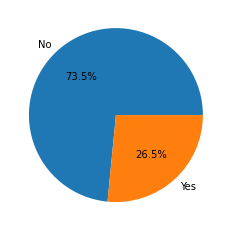

In [97]:
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show() 

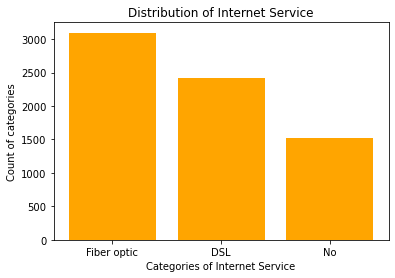

In [99]:
#B)-b.
plt.bar(customer['InternetService'].value_counts().keys().tolist(),customer['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show() 

## C) Model Building:

### First Model 

In [ ]:
#C)-a.

"""
a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph
"""

In [196]:
x = customer[["tenure"]]
y = customer[["Churn"]]

In [197]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42) 

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [200]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y_train = lenc.fit_transform(y_train)
y_test = lenc.fit_transform(y_test)

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [202]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [203]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 

Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4930/4930 [==============================] - 0s 73us/sample - loss: 0.6517 - acc: 0.6546 - val_loss: 0.5814 - val_acc: 0.7283
Epoch 2/150
1728/4930 [=========>....................] - ETA: 0s - loss: 0.5429 - acc: 0.7575

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


4930/4930 [==============================] - 0s 39us/sample - loss: 0.5320 - acc: 0.7373 - val_loss: 0.5132 - val_acc: 0.7283
Epoch 3/150
4930/4930 [==============================] - 0s 43us/sample - loss: 0.5110 - acc: 0.7373 - val_loss: 0.5104 - val_acc: 0.7283
Epoch 4/150
4930/4930 [==============================] - 0s 66us/sample - loss: 0.5097 - acc: 0.7477 - val_loss: 0.5112 - val_acc: 0.7283
Epoch 5/150
4930/4930 [==============================] - 0s 65us/sample - loss: 0.5097 - acc: 0.7475 - val_loss: 0.5106 - val_acc: 0.7269
Epoch 6/150
4930/4930 [==============================] - 0s 65us/sample - loss: 0.5091 - acc: 0.7542 - val_loss: 0.5094 - val_acc: 0.7549
Epoch 7/150
4930/4930 [==============================] - 0s 65us/sample - loss: 0.5090 - acc: 0.7487 - val_loss: 0.5093 - val_acc: 0.7549
Epoch 8/150
4930/4930 [==============================] - 0s 65us/sample - loss: 0.5090 - acc: 0.7497 - val_loss: 0.5099 - val_acc: 0.7539
Epoch 9/150
4930/4930 [=======================

4930/4930 [==============================] - 0s 64us/sample - loss: 0.5058 - acc: 0.7535 - val_loss: 0.5103 - val_acc: 0.7539
Epoch 62/150
4930/4930 [==============================] - 0s 66us/sample - loss: 0.5061 - acc: 0.7519 - val_loss: 0.5092 - val_acc: 0.7511
Epoch 63/150
4930/4930 [==============================] - 0s 65us/sample - loss: 0.5058 - acc: 0.7538 - val_loss: 0.5089 - val_acc: 0.7459
Epoch 64/150
4930/4930 [==============================] - 0s 68us/sample - loss: 0.5057 - acc: 0.7544 - val_loss: 0.5096 - val_acc: 0.7549
Epoch 65/150
4930/4930 [==============================] - 0s 66us/sample - loss: 0.5059 - acc: 0.7538 - val_loss: 0.5091 - val_acc: 0.7459
Epoch 66/150
4930/4930 [==============================] - 0s 81us/sample - loss: 0.5057 - acc: 0.7556 - val_loss: 0.5102 - val_acc: 0.7549
Epoch 67/150
4930/4930 [==============================] - 0s 70us/sample - loss: 0.5060 - acc: 0.7531 - val_loss: 0.5095 - val_acc: 0.7549
Epoch 68/150
4930/4930 [================

Epoch 120/150
4930/4930 [==============================] - 0s 41us/sample - loss: 0.5056 - acc: 0.7538 - val_loss: 0.5093 - val_acc: 0.7549
Epoch 121/150
4930/4930 [==============================] - 0s 43us/sample - loss: 0.5054 - acc: 0.7527 - val_loss: 0.5103 - val_acc: 0.7549
Epoch 122/150
4930/4930 [==============================] - 0s 42us/sample - loss: 0.5055 - acc: 0.7548 - val_loss: 0.5089 - val_acc: 0.7511
Epoch 123/150
4930/4930 [==============================] - 0s 37us/sample - loss: 0.5053 - acc: 0.7550 - val_loss: 0.5093 - val_acc: 0.7459
Epoch 124/150
4930/4930 [==============================] - 0s 45us/sample - loss: 0.5054 - acc: 0.7538 - val_loss: 0.5092 - val_acc: 0.7549
Epoch 125/150
4930/4930 [==============================] - 0s 37us/sample - loss: 0.5054 - acc: 0.7546 - val_loss: 0.5097 - val_acc: 0.7549
Epoch 126/150
4930/4930 [==============================] - 0s 45us/sample - loss: 0.5053 - acc: 0.7538 - val_loss: 0.5091 - val_acc: 0.7511
Epoch 127/150
4930/4

In [204]:
import numpy as np
np.mean(model.history.history['val_acc'])

0.7516833

In [205]:
y_pred = model.predict(x_test)
classes_y = np.argmax(y_pred, axis=1)

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,classes_y) 

array([[1539,    0],
       [ 574,    0]], dtype=int64)

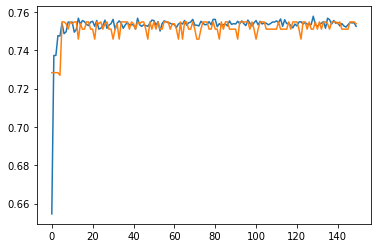

In [207]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.show()

### Second Model 

In [ ]:
#C)-b.

"""
b. Build the 2nd model using same target and feature variables:
i. Add a drop-out layer after the input layer with drop-out value of 0.3
ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
iii. Predict the values on the test set and build a confusion matrix
iv. Plot the ‘Accuracy vs Epochs’ graph
"""

In [208]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 

In [209]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))
y_pred = model.predict(x_test)
classes_y = np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,classes_y) 

Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4930/4930 [==============================] - 0s 79us/sample - loss: 0.6211 - acc: 0.7085 - val_loss: 0.5615 - val_acc: 0.7283
Epoch 2/150
1504/4930 [========>.....................] - ETA: 0s - loss: 0.5583 - acc: 0.7367

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


4930/4930 [==============================] - 0s 45us/sample - loss: 0.5552 - acc: 0.7367 - val_loss: 0.5262 - val_acc: 0.7283
Epoch 3/150
4930/4930 [==============================] - 0s 46us/sample - loss: 0.5402 - acc: 0.7406 - val_loss: 0.5191 - val_acc: 0.7283
Epoch 4/150
4930/4930 [==============================] - 0s 46us/sample - loss: 0.5388 - acc: 0.7400 - val_loss: 0.5153 - val_acc: 0.7283
Epoch 5/150
4930/4930 [==============================] - 0s 46us/sample - loss: 0.5328 - acc: 0.7377 - val_loss: 0.5143 - val_acc: 0.7283
Epoch 6/150
4930/4930 [==============================] - 0s 49us/sample - loss: 0.5331 - acc: 0.7436 - val_loss: 0.5155 - val_acc: 0.7283
Epoch 7/150
4930/4930 [==============================] - 0s 47us/sample - loss: 0.5281 - acc: 0.7444 - val_loss: 0.5131 - val_acc: 0.7283
Epoch 8/150
4930/4930 [==============================] - 0s 45us/sample - loss: 0.5250 - acc: 0.7450 - val_loss: 0.5119 - val_acc: 0.7283
Epoch 9/150
4930/4930 [=======================

Epoch 61/150
4930/4930 [==============================] - 0s 51us/sample - loss: 0.5151 - acc: 0.7473 - val_loss: 0.5115 - val_acc: 0.7539
Epoch 62/150
4930/4930 [==============================] - 0s 43us/sample - loss: 0.5136 - acc: 0.7475 - val_loss: 0.5145 - val_acc: 0.7283
Epoch 63/150
4930/4930 [==============================] - 0s 47us/sample - loss: 0.5154 - acc: 0.7527 - val_loss: 0.5157 - val_acc: 0.7283
Epoch 64/150
4930/4930 [==============================] - 0s 45us/sample - loss: 0.5128 - acc: 0.7477 - val_loss: 0.5139 - val_acc: 0.7283
Epoch 65/150
4930/4930 [==============================] - 0s 47us/sample - loss: 0.5125 - acc: 0.7448 - val_loss: 0.5136 - val_acc: 0.7283
Epoch 66/150
4930/4930 [==============================] - 0s 44us/sample - loss: 0.5173 - acc: 0.7391 - val_loss: 0.5127 - val_acc: 0.7283
Epoch 67/150
4930/4930 [==============================] - 0s 43us/sample - loss: 0.5182 - acc: 0.7434 - val_loss: 0.5130 - val_acc: 0.7283
Epoch 68/150
4930/4930 [===

4930/4930 [==============================] - 0s 52us/sample - loss: 0.5129 - acc: 0.7483 - val_loss: 0.5158 - val_acc: 0.7283
Epoch 120/150
4930/4930 [==============================] - 0s 44us/sample - loss: 0.5144 - acc: 0.7440 - val_loss: 0.5165 - val_acc: 0.7283
Epoch 121/150
4930/4930 [==============================] - 0s 44us/sample - loss: 0.5139 - acc: 0.7467 - val_loss: 0.5130 - val_acc: 0.7283
Epoch 122/150
4930/4930 [==============================] - 0s 49us/sample - loss: 0.5141 - acc: 0.7440 - val_loss: 0.5138 - val_acc: 0.7283
Epoch 123/150
4930/4930 [==============================] - 0s 43us/sample - loss: 0.5141 - acc: 0.7456 - val_loss: 0.5141 - val_acc: 0.7283
Epoch 124/150
4930/4930 [==============================] - 0s 46us/sample - loss: 0.5137 - acc: 0.7505 - val_loss: 0.5147 - val_acc: 0.7283
Epoch 125/150
4930/4930 [==============================] - 0s 43us/sample - loss: 0.5137 - acc: 0.7440 - val_loss: 0.5152 - val_acc: 0.7283
Epoch 126/150
4930/4930 [=========

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[1539,    0],
       [ 574,    0]], dtype=int64)

In [210]:
import numpy as np
np.mean(model.history.history['val_acc']) 

0.72851866

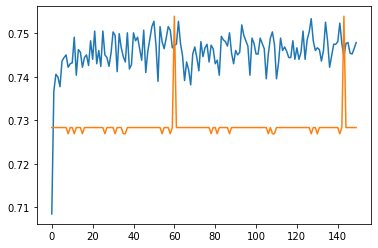

In [211]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.show() 

### Third Model 

In [ ]:
#C)-c.

"""
c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
iii. Use ‘Adam’ as the optimization algorithm
iv. Fit the model on the train set, with number of epochs to be 150
v. Predict the values on the test set and build a confusion matrix
vi. Plot the ‘Accuracy vs Epochs’ graph
"""

In [218]:
x=customer[['MonthlyCharges','tenure','TotalCharges']]#Features
y=customer[['Churn']]#Target 

In [219]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [221]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y_train = lenc.fit_transform(y_train)
y_test = lenc.fit_transform(y_test)

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [222]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Train on 4930 samples, validate on 2113 samples
Epoch 1/150
4930/4930 [==============================] - 0s 72us/sample - loss: 0.5337 - acc: 0.7527 - val_loss: 0.4803 - val_acc: 0.7709
Epoch 2/150
1504/4930 [========>.....................] - ETA: 0s - loss: 0.4629 - acc: 0.7799

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


4930/4930 [==============================] - 0s 43us/sample - loss: 0.4757 - acc: 0.7763 - val_loss: 0.4608 - val_acc: 0.7847
Epoch 3/150
4930/4930 [==============================] - 0s 38us/sample - loss: 0.4671 - acc: 0.7803 - val_loss: 0.4541 - val_acc: 0.7856
Epoch 4/150
4930/4930 [==============================] - 0s 40us/sample - loss: 0.4637 - acc: 0.7793 - val_loss: 0.4506 - val_acc: 0.7847
Epoch 5/150
4930/4930 [==============================] - 0s 40us/sample - loss: 0.4613 - acc: 0.7807 - val_loss: 0.4482 - val_acc: 0.7851
Epoch 6/150
4930/4930 [==============================] - 0s 47us/sample - loss: 0.4593 - acc: 0.7819 - val_loss: 0.4475 - val_acc: 0.7894
Epoch 7/150
4930/4930 [==============================] - 0s 44us/sample - loss: 0.4578 - acc: 0.7864 - val_loss: 0.4456 - val_acc: 0.7894
Epoch 8/150
4930/4930 [==============================] - 0s 38us/sample - loss: 0.4572 - acc: 0.7840 - val_loss: 0.4439 - val_acc: 0.7875
Epoch 9/150
4930/4930 [=======================

4930/4930 [==============================] - 0s 38us/sample - loss: 0.4448 - acc: 0.7913 - val_loss: 0.4361 - val_acc: 0.7956
Epoch 61/150
4930/4930 [==============================] - 0s 39us/sample - loss: 0.4453 - acc: 0.7897 - val_loss: 0.4362 - val_acc: 0.7965
Epoch 62/150
4930/4930 [==============================] - 0s 41us/sample - loss: 0.4441 - acc: 0.7923 - val_loss: 0.4372 - val_acc: 0.7941
Epoch 63/150
4930/4930 [==============================] - 0s 37us/sample - loss: 0.4443 - acc: 0.7913 - val_loss: 0.4358 - val_acc: 0.7979
Epoch 64/150
4930/4930 [==============================] - 0s 38us/sample - loss: 0.4446 - acc: 0.7897 - val_loss: 0.4357 - val_acc: 0.7974
Epoch 65/150
4930/4930 [==============================] - 0s 37us/sample - loss: 0.4446 - acc: 0.7925 - val_loss: 0.4367 - val_acc: 0.7937
Epoch 66/150
4930/4930 [==============================] - 0s 41us/sample - loss: 0.4446 - acc: 0.7911 - val_loss: 0.4370 - val_acc: 0.7908
Epoch 67/150
4930/4930 [================

4930/4930 [==============================] - 0s 39us/sample - loss: 0.4429 - acc: 0.7925 - val_loss: 0.4359 - val_acc: 0.7946
Epoch 119/150
4930/4930 [==============================] - 0s 38us/sample - loss: 0.4430 - acc: 0.7929 - val_loss: 0.4358 - val_acc: 0.7941
Epoch 120/150
4930/4930 [==============================] - 0s 37us/sample - loss: 0.4422 - acc: 0.7939 - val_loss: 0.4359 - val_acc: 0.7941
Epoch 121/150
4930/4930 [==============================] - 0s 39us/sample - loss: 0.4426 - acc: 0.7921 - val_loss: 0.4354 - val_acc: 0.7951
Epoch 122/150
4930/4930 [==============================] - ETA: 0s - loss: 0.4426 - acc: 0.789 - 0s 40us/sample - loss: 0.4426 - acc: 0.7897 - val_loss: 0.4350 - val_acc: 0.7970
Epoch 123/150
4930/4930 [==============================] - 0s 39us/sample - loss: 0.4429 - acc: 0.7923 - val_loss: 0.4352 - val_acc: 0.7965
Epoch 124/150
4930/4930 [==============================] - 0s 38us/sample - loss: 0.4432 - acc: 0.7899 - val_loss: 0.4355 - val_acc: 0.7

In [225]:
y_pred = model.predict(x_test)
classes_y = np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,classes_y)

C:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[1539,    0],
       [ 574,    0]], dtype=int64)

In [227]:
import numpy as np
np.mean(model.history.history['val_acc']) 

0.7939675

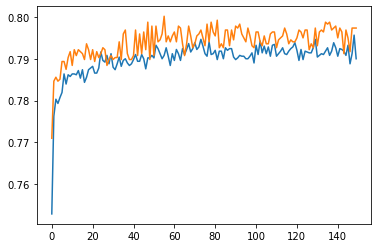

In [226]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.show() 